# Examen Práctico

Se nos ha pedido que controlemos la potabilidad del agua tras la DANA de Valencia. Estos valores deben ir entorno a estos valores:

1. Recomendable
2. Apto
3. No apto

El dataset obtenido consta de 4 características: pH, dureza, turbidez y presencia de metales.

### 1) Exploración
Lo primero que haremos será abrir el dataset para ver en que situación tenemos nuestros datos.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
from mpl_toolkits.mplot3d import Axes3D
from re import sub
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz


data = pd.read_csv('dataset_ok_water.csv')
data

,ph,dureza,turbidez,metales,resultado
0,0.2,3.0,1.1,0.1,potable-recomendada
1,NaN,3.0,1.3,0.2,potable-recomendada
2,4.4,3.2,1.3,0.2,potable-recomendada
3,4.4,2.9,1.4,0.2,potable-recomendada
4,4.5,2.3,1.3,0.3,potable-recomendada
...,...,...,...,...,...
145,NaN,2.8,6.7,2.0,no-potable
146,7.7,3.8,6.7,2.2,no-potable
147,7.7,3.0,6.1,NaN,no-potable
148,7.7,2.6,6.9,2.3,no-potable


Vemos que existen valores faltantes debido al accidente con la DANA. Vamos a ver cuantos valores faltantes tiene el dataset.

In [ ]:
print (data.isnull().sum().sort_values(ascending = False))

ph           6
metales      5
turbidez     3
dureza       1
resultado    0
dtype: int64


Vemos todas las columnas excepto los resultados han sido afectadas. Para este caso existen diferentes formas de abordar el problema.

1. Sustituir los valores faltantes por la media

Si nuestro valores son numéricos, podemos cambiar los valores faltantes por la media. De esta forma, la consistencia de los datos puede mantenerse sin afectar los resultados.

In [ ]:
X_sust = data.drop('resultado', axis=1)

for i in X_sust.columns:
    X_sust.fillna({i: round(X_sust[i].mean(), 1)}, inplace=True)

X_sust

,ph,dureza,turbidez,metales
0,0.2,3.0,1.1,0.1
1,5.8,3.0,1.3,0.2
2,4.4,3.2,1.3,0.2
3,4.4,2.9,1.4,0.2
4,4.5,2.3,1.3,0.3
...,...,...,...,...
145,5.8,2.8,6.7,2.0
146,7.7,3.8,6.7,2.2
147,7.7,3.0,6.1,1.2
148,7.7,2.6,6.9,2.3


Como podemos observar, los valores faltantes han sido sustituidos correctamente, se han separado las características del objetivo para hacer la sustitución correctamente.

2. Métodos de Imputación

Son los métodos más utilizados a la hora de usar sistemas inteligentes, vamos a ver dos que son el `SimpleImputer` y el `KNNImputer`.

2.1. `SimpleImputer`

Este es el método más básico para la imputación univariada. Reemplaza los valores faltantes en cada columna con un valor estadístico constante, como la media, la mediana o la moda.

In [ ]:
X_simple = data.drop('resultado', axis=1)
imputer = SimpleImputer(strategy='mean') # Usaremos la media
X_simple = imputer.fit_transform(X_simple)
X_simple

array([[ 0.2       ,  3.        ,  1.1       ,  0.1       ],
       [ 5.81388889,  3.        ,  1.3       ,  0.2       ],
       [ 4.4       ,  3.2       ,  1.3       ,  0.2       ],
       [ 4.4       ,  2.9       ,  1.4       ,  0.2       ],
       [ 4.5       ,  2.3       ,  1.3       ,  0.3       ],
       [ 4.6       ,  3.6       ,  1.        ,  0.2       ],
       [ 4.6       ,  3.2       ,  1.4       ,  0.2       ],
       [ 4.6       ,  3.1       ,  1.5       ,  0.2       ],
       [ 4.6       ,  3.4       ,  1.4       ,  0.3       ],
       [ 4.7       ,  3.2       ,  3.7829932 ,  0.2       ],
       [ 4.7       ,  3.2       ,  1.6       ,  0.2       ],
       [ 4.8       ,  3.        ,  1.4       ,  0.1       ],
       [ 4.8       ,  3.4       ,  1.6       ,  0.2       ],
       [ 4.8       ,  3.1       ,  1.6       ,  0.2       ],
       [ 4.8       ,  3.4       ,  1.9       ,  0.2       ],
       [ 4.8       ,  3.        ,  1.4       ,  0.3       ],
       [ 4.9       ,  3.

Como vemos, ha hecho exactamente lo mismos que el método anterior pero este requiere de menos código por lo que es mejor que ir recorriendo las columnas y cambiar los valores.

2.2. `KNNImputer`

Este método utiliza el algoritmo k-Nearest Neighbors para imputar valores faltantes. Encuentra los k vecinos más cercanos a una instancia con valores faltantes y utiliza la media (o mediana) de los valores de esos vecinos para imputar los valores faltantes.

In [ ]:
X_knn = data.drop('resultado', axis=1)
imputer = KNNImputer(n_neighbors=5) # Usaremos 5 vecinos
X_knn = imputer.fit_transform(X_knn)
X_knn

array([[ 0.2 ,  3.  ,  1.1 ,  0.1 ],
       [ 4.78,  3.  ,  1.3 ,  0.2 ],
       [ 4.4 ,  3.2 ,  1.3 ,  0.2 ],
       [ 4.4 ,  2.9 ,  1.4 ,  0.2 ],
       [ 4.5 ,  2.3 ,  1.3 ,  0.3 ],
       [ 4.6 ,  3.6 ,  1.  ,  0.2 ],
       [ 4.6 ,  3.2 ,  1.4 ,  0.2 ],
       [ 4.6 ,  3.1 ,  1.5 ,  0.2 ],
       [ 4.6 ,  3.4 ,  1.4 ,  0.3 ],
       [ 4.7 ,  3.2 ,  1.6 ,  0.2 ],
       [ 4.7 ,  3.2 ,  1.6 ,  0.2 ],
       [ 4.8 ,  3.  ,  1.4 ,  0.1 ],
       [ 4.8 ,  3.4 ,  1.6 ,  0.2 ],
       [ 4.8 ,  3.1 ,  1.6 ,  0.2 ],
       [ 4.8 ,  3.4 ,  1.9 ,  0.2 ],
       [ 4.8 ,  3.  ,  1.4 ,  0.3 ],
       [ 4.9 ,  3.1 ,  1.5 ,  0.1 ],
       [ 4.9 ,  3.1 ,  1.5 ,  0.1 ],
       [ 4.9 ,  3.1 ,  1.5 ,  0.1 ],
       [ 4.9 ,  3.  ,  1.4 ,  0.2 ],
       [ 4.9 ,  2.4 ,  3.3 ,  1.  ],
       [ 4.9 ,  2.5 ,  4.5 ,  1.7 ],
       [ 5.  ,  3.2 ,  1.2 ,  0.2 ],
       [ 5.  ,  3.6 ,  1.4 ,  0.2 ],
       [ 5.  ,  3.3 ,  1.4 ,  0.2 ],
       [ 5.  ,  3.4 ,  1.5 ,  0.2 ],
       [ 5.  ,  3.  ,  1.6 ,  0.2 ],
 

Vemos que con este método los valores son más semejantes ya que al basarse en los datos cercanos a ellos obtienen valores similares a sus vecinos y por ende no son tan dispares como con la media.

Debido a esto, y escogeré `KNNImputer` porque sus resultados me parecen mejores que los demás.

2) Outliers

Los valores atípicos son típicos cuando se trabajan con dataset. Intentaremos identificarlos usando el rango intercuartílico que es una medida bastante buena para detectar outliers.

In [ ]:
X = X_knn

q1 = np.percentile(X, 25)
q3 = np.percentile(X, 75)
iqr = q3 - q1
print(f"Primer Cuantil: {q1}")
print(f"Tercer Cuantil: {q3}")
print(f"Rango Intercuartílico: {iqr}")

k = 1.5
lower_bound = q1 - k * iqr
upper_bound = q3 + k * iqr
print(f"Límite Inferior: {lower_bound}")
print(f"Límite Superior: {upper_bound}")
print("-"*15)

for i in range(len(X)):
    # Iterate through each element of the row
    for j in range(X.shape[1]):
        if X[i, j] < lower_bound or X[i, j] > upper_bound:
            print(f"datos[{i},{j}]={X[i, j]} es outlier")

Primer Cuantil: 1.7
Tercer Cuantil: 5.1
Rango Intercuartílico: 3.3999999999999995
Límite Inferior: -3.3999999999999995
Límite Superior: 10.2
---------------
datos[38,1]=12.0 es outlier


Usando el rango intercuartílico hemos localizado un outlier en la fila 38 y en la columna 1 (dureza). Esto implica que debemos estandarizar nuestros datos para controlar los ouliers. Como métodos de escalamiento estan por rangos, Z-score y potencias de 10. Pero todos ellos son sensibles a los outliers.

Así que podemos usar RobustScaler. El escalado robusto es menos sensible a los outliers que el escalado estándar. En lugar de usar la media y la desviación estándar, utiliza la mediana y el rango intercuartílico para escalar los datos. Esto ayuda a reducir la influencia de los valores atípicos.

In [ ]:
robust_scaler = RobustScaler()
X_scaled = robust_scaler.fit_transform(X)
X_scaled

array([[-4.30769231e+00,  0.00000000e+00, -9.28571429e-01,
        -8.00000000e-01],
       [-7.84615385e-01,  0.00000000e+00, -8.71428571e-01,
        -7.33333333e-01],
       [-1.07692308e+00,  4.00000000e-01, -8.71428571e-01,
        -7.33333333e-01],
       [-1.07692308e+00, -2.00000000e-01, -8.42857143e-01,
        -7.33333333e-01],
       [-1.00000000e+00, -1.40000000e+00, -8.71428571e-01,
        -6.66666667e-01],
       [-9.23076923e-01,  1.20000000e+00, -9.57142857e-01,
        -7.33333333e-01],
       [-9.23076923e-01,  4.00000000e-01, -8.42857143e-01,
        -7.33333333e-01],
       [-9.23076923e-01,  2.00000000e-01, -8.14285714e-01,
        -7.33333333e-01],
       [-9.23076923e-01,  8.00000000e-01, -8.42857143e-01,
        -6.66666667e-01],
       [-8.46153846e-01,  4.00000000e-01, -7.85714286e-01,
        -7.33333333e-01],
       [-8.46153846e-01,  4.00000000e-01, -7.85714286e-01,
        -7.33333333e-01],
       [-7.69230769e-01,  0.00000000e+00, -8.42857143e-01,
      

De esta forma podemos estandarizar nuestros datos sin tener problemas con los outliers.

### 3) Visualización

Por último, vamos a visualizar los datos en base a las distintas características. Para ello imprimiremos 4 gráficas en 3 dimensiones cambiando las características.

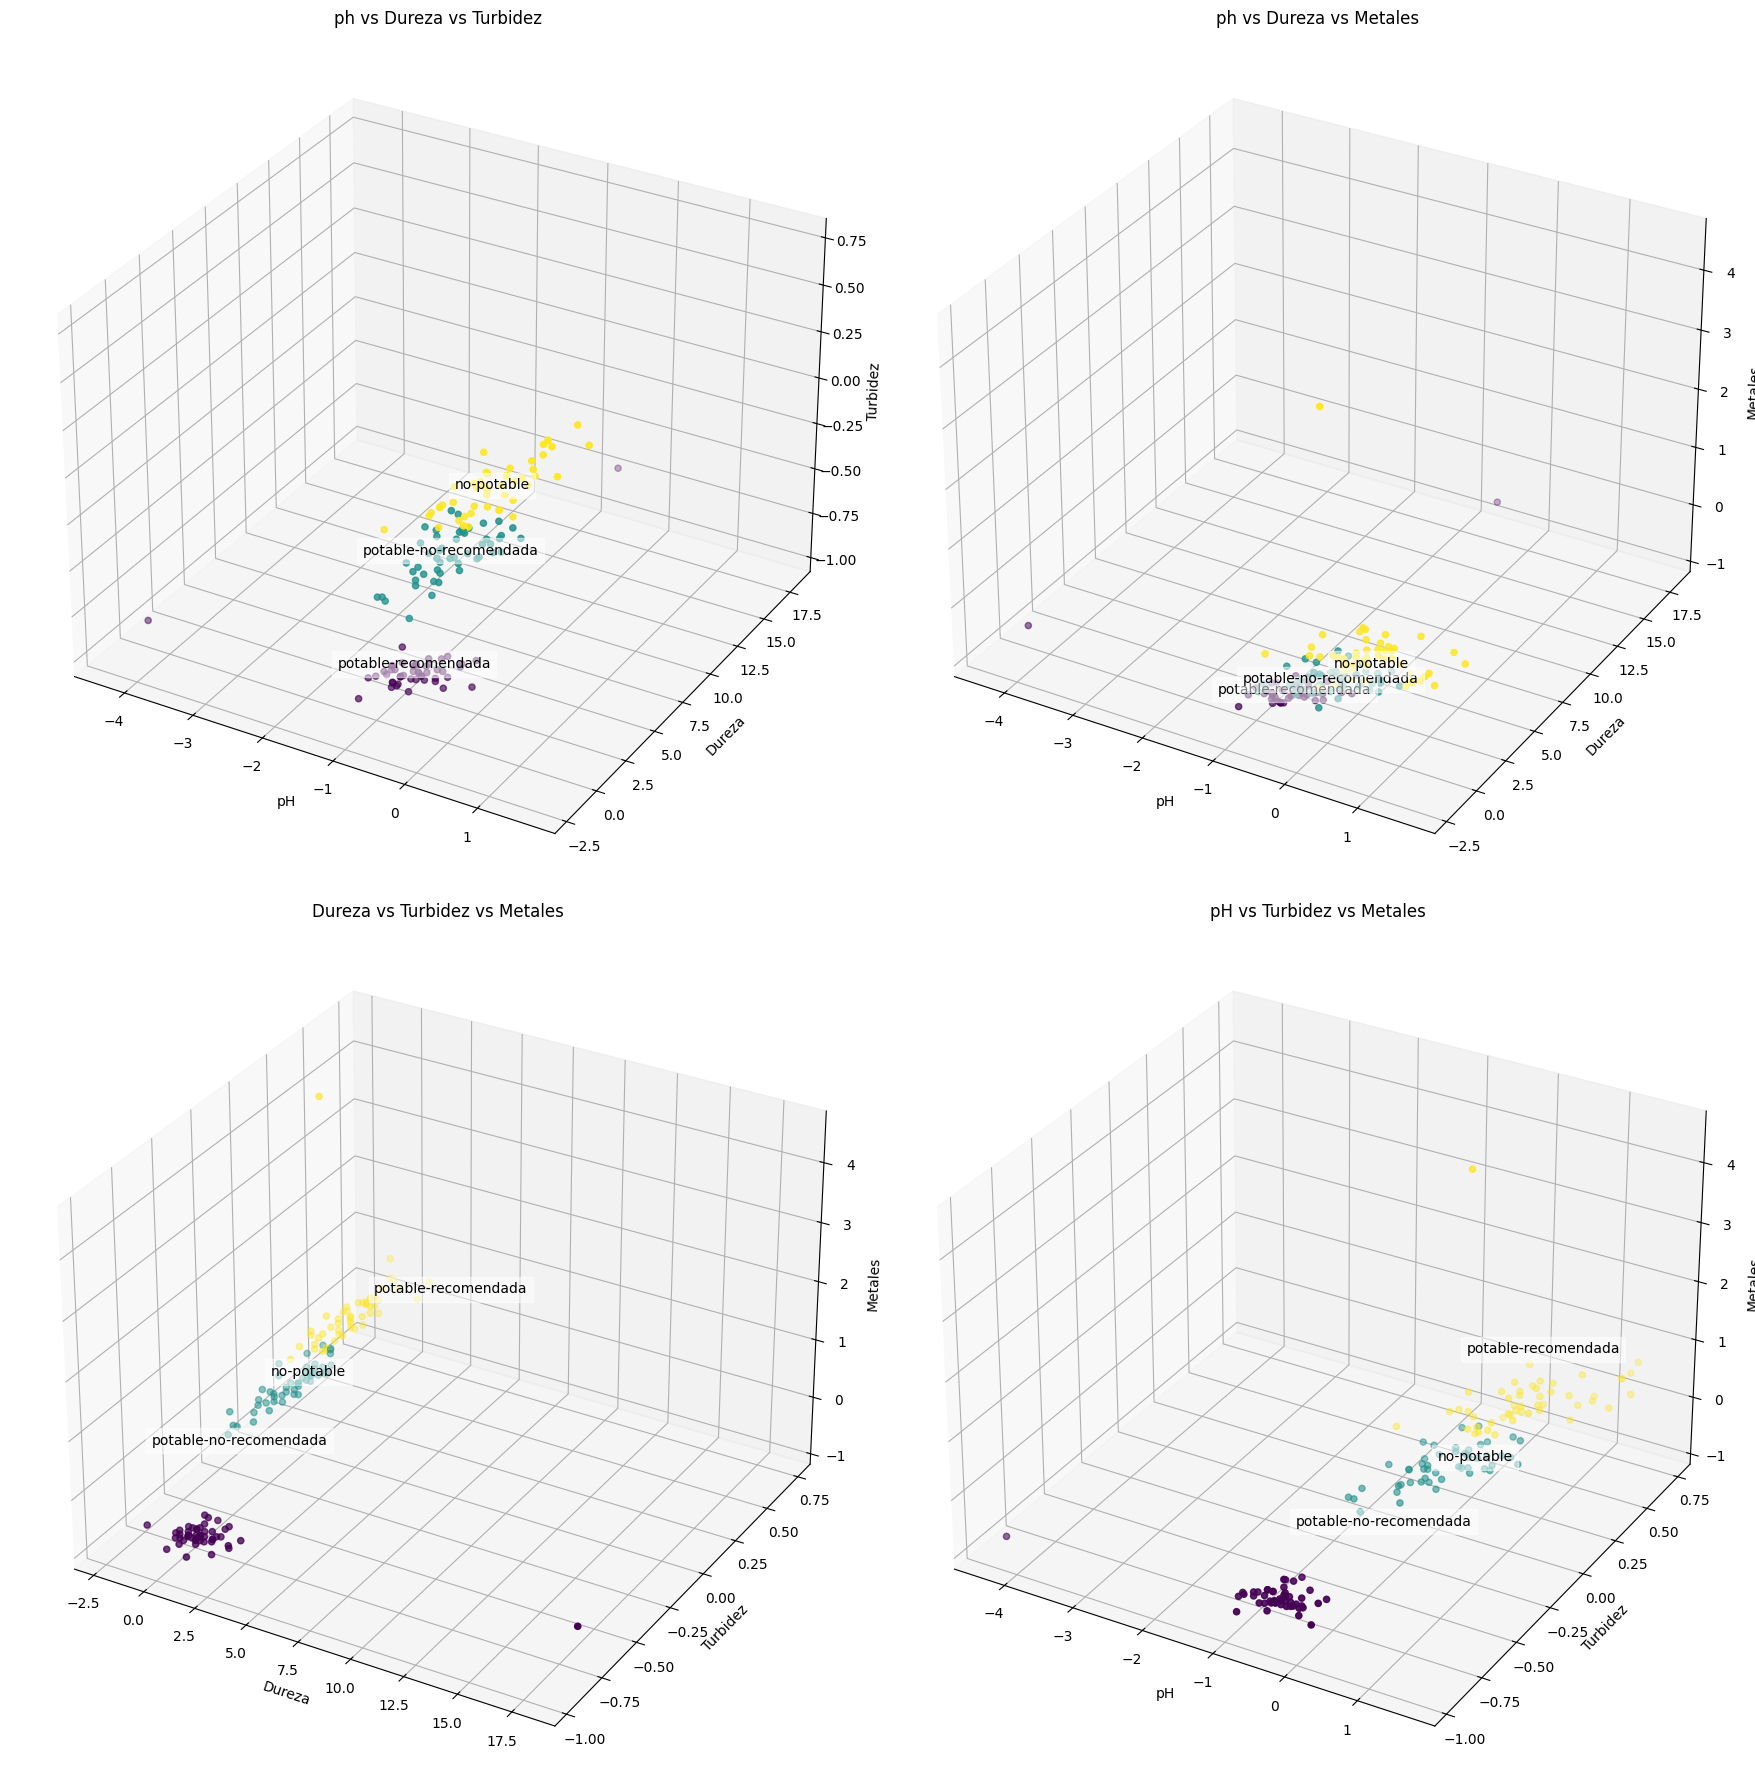

In [ ]:
y = data['resultado']

color_mapping = {
    'potable-recomendada': 0,
    'potable-no-recomendada': 1,
    'no-potable': 2
}

y_numeric = np.array([color_mapping[category] for category in y])

# Diccionario inverso para obtener nombres de categorías
inverse_color_mapping = {v: k for k, v in color_mapping.items()}

fig = plt.figure(figsize=(18, 18))

subfig = fig.add_subplot(2,2,1, projection='3d')
subfig.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=y_numeric)
subfig.set_xlabel('pH')
subfig.set_ylabel('Dureza')
subfig.set_zlabel('Turbidez')
plt.title('ph vs Dureza vs Turbidez')
plt.tight_layout()

# Añadir texto para cada categoría
for label, category_name in inverse_color_mapping.items():
    subfig.text(
        X_scaled[y_numeric == label, 0].mean(),
        X_scaled[y_numeric == label, 1].mean(),
        X_scaled[y_numeric == label, 2].mean(),
        category_name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
)

subfig2 = fig.add_subplot(2,2,2, projection='3d')
subfig2.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 3], c=y_numeric)
subfig2.set_xlabel('pH')
subfig2.set_ylabel('Dureza')
subfig2.set_zlabel('Metales')
plt.title('ph vs Dureza vs Metales')
plt.tight_layout()

for label, category_name in inverse_color_mapping.items():
    subfig2.text(
        X_scaled[y_numeric == label, 0].mean(),
        X_scaled[y_numeric == label, 1].mean(),
        X_scaled[y_numeric == label, 2].mean(),
        category_name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
)

subfig3 = fig.add_subplot(2,2,3, projection='3d')
subfig3.scatter(X_scaled[:, 1], X_scaled[:, 2], X_scaled[:, 3], c=y_numeric)
subfig3.set_xlabel('Dureza')
subfig3.set_ylabel('Turbidez')
subfig3.set_zlabel('Metales')
plt.title('Dureza vs Turbidez vs Metales')
plt.tight_layout()

for label, category_name in inverse_color_mapping.items():
    subfig3.text(
        X_scaled[y_numeric == label, 0].mean(),
        X_scaled[y_numeric == label, 1].mean(),
        X_scaled[y_numeric == label, 2].mean(),
        category_name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
)

subfig4 = fig.add_subplot(2,2,4, projection='3d')
subfig4.scatter(X_scaled[:, 0], X_scaled[:, 2], X_scaled[:, 3], c=y_numeric)
subfig4.set_xlabel('pH')
subfig4.set_ylabel('Turbidez')
subfig4.set_zlabel('Metales')
plt.title('pH vs Turbidez vs Metales')
plt.tight_layout()

for label, category_name in inverse_color_mapping.items():
    subfig4.text(
        X_scaled[y_numeric == label, 0].mean(),
        X_scaled[y_numeric == label, 1].mean(),
        X_scaled[y_numeric == label, 2].mean(),
        category_name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
)

plt.show()

Por último, haremos un mapa de calor para estudiar las correlaciones entre variables.

<ipython-input-10-035e6cf1d552>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_data = data.replace({'resultado': {'potable-recomendada': 0, 'potable-no-recomendada': 1, 'no-potable': 2}})


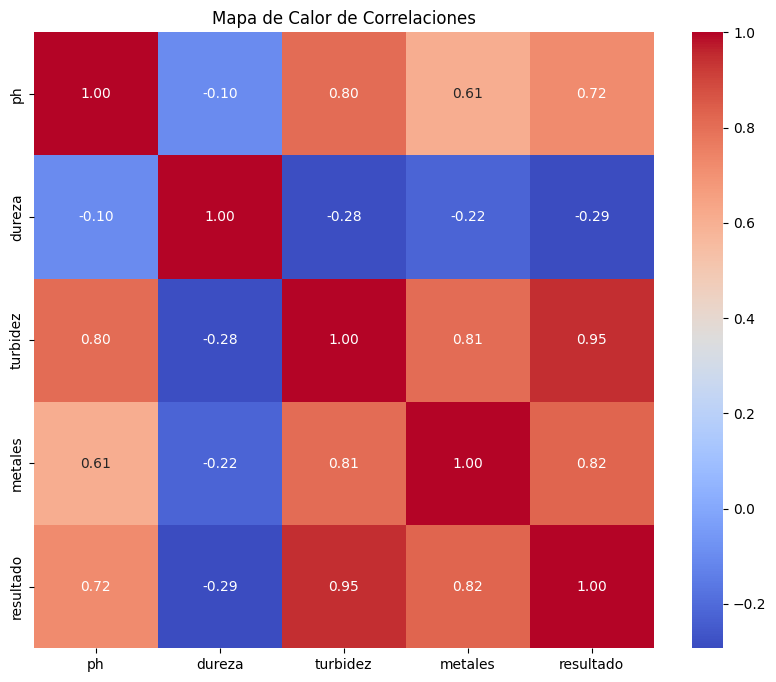

In [ ]:
# Mapa de calor, habrá que transformar la columna 'resultado' a numérica
new_data = data.replace({'resultado': {'potable-recomendada': 0, 'potable-no-recomendada': 1, 'no-potable': 2}})
corr_matrix = new_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlaciones')
plt.show()

Podemos observar que existe una fuerte relación con el resultado las características turbidez con un 0.95, metales con un 0.82 y por último el pH con 0.72.

Estas características nos ayudarán mucho para obtener resultados con los modelos.

### 4) KNN

Ahora vamos con la hora de crear diferentes modelos y ver que resultados obtenemos. Empezaremos con KNN que se encarga de clasificar los datos según los k vecinos.

In [ ]:
X_sust = data.drop('resultado', axis=1)

for i in X_sust.columns:
    X_sust.fillna({i: round(X_sust[i].mean(), 1)}, inplace=True)

y = data['resultado']

# Correct order for train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sust, y, test_size=0.3, random_state=42)

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors=3)
knn2 = KNeighborsClassifier(n_neighbors=2)

knn1.fit(X_train, y_train)
knn2.fit(X_train, y_train)

# Make predictions
y_pred1 = knn1.predict(X_test)
y_pred2 = knn2.predict(X_test)

# Print classification reports
print("KNN con 3 vecinos:")
print(classification_report(y_test, y_pred1))
print("KNN con 2 vecinos:")
print(classification_report(y_test, y_pred2))

KNN con 3 vecinos:
                        precision    recall  f1-score   support

            no-potable       1.00      0.94      0.97        16
potable-no-recomendada       0.83      1.00      0.91        10
   potable-recomendada       1.00      0.95      0.97        19

              accuracy                           0.96        45
             macro avg       0.94      0.96      0.95        45
          weighted avg       0.96      0.96      0.96        45

KNN con 2 vecinos:
                        precision    recall  f1-score   support

            no-potable       1.00      0.94      0.97        16
potable-no-recomendada       0.83      1.00      0.91        10
   potable-recomendada       1.00      0.95      0.97        19

              accuracy                           0.96        45
             macro avg       0.94      0.96      0.95        45
          weighted avg       0.96      0.96      0.96        45



He tenido que poner la media para poder evitar los errores de `NAN`. Vemos que los modelos han salido más o menos bien. Vamos a representarlo

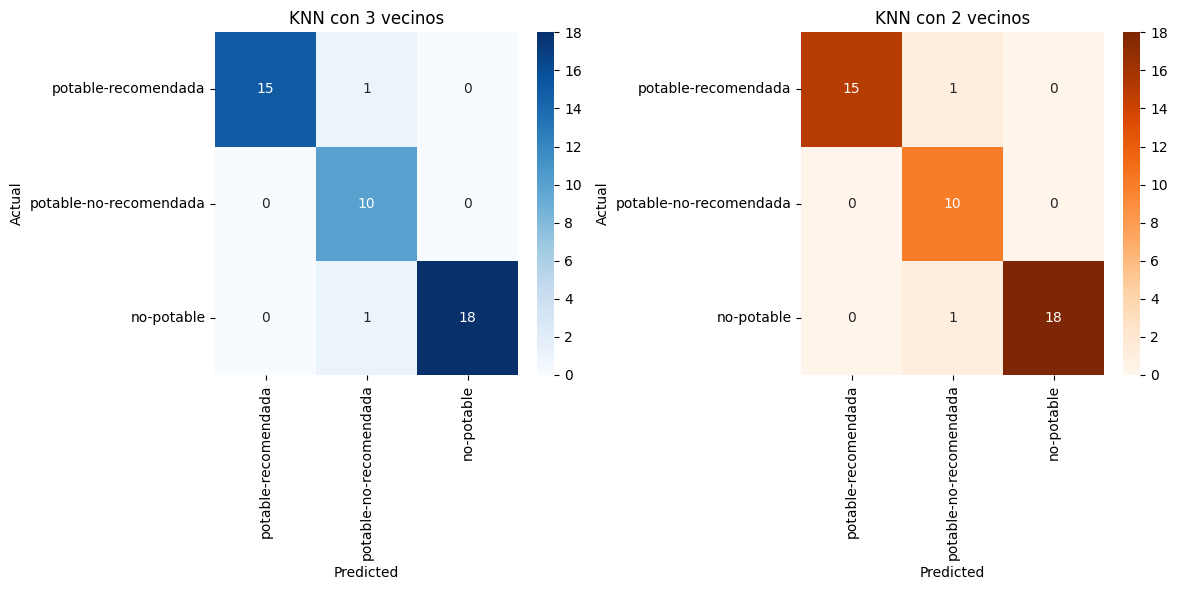

In [ ]:
cm1 = confusion_matrix(y_test, y_pred1)
cm2 = confusion_matrix(y_test, y_pred2)

DF_COLUMNS = data['resultado'].unique()

DF_INDEX = data['resultado'].unique()

cm1_df = pd.DataFrame(cm1, columns=DF_COLUMNS, index=DF_INDEX)
cm2_df = pd.DataFrame(cm2, columns=DF_COLUMNS, index=DF_INDEX)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(cm1_df, annot=True, fmt="d", cmap="Blues", ax=ax1)
ax1.set_title("KNN con 3 vecinos")
ax1.set_xlabel("Predicted")
ax1.set_ylabel("Actual")

sns.heatmap(cm2_df, annot=True, fmt="d", cmap="Oranges", ax=ax2)
ax2.set_title("KNN con 2 vecinos")
ax2.set_xlabel("Predicted")
ax2.set_ylabel("Actual")

plt.tight_layout()
plt.show()

Como podemos ver, los errores han sido mínimos en ambos casos fallando muy poco. Lo que indica que nuestros modelos son bastantes buenos para 2 y 3 vecinos.

### 5) Árboles de decisión

Lo siguiente será realizar algunos modelos basados en árboles de decisiones de los cuales intentaremos sacar su representación y las matrices de confusión.

In [ ]:
dt1 = DecisionTreeClassifier(max_depth=3, random_state=42)
dt2 = DecisionTreeClassifier(random_state=42)

dt1.fit(X_train, y_train)
dt2.fit(X_train, y_train)

y_pred_dt1 = dt1.predict(X_test)
y_pred_dt2 = dt2.predict(X_test)

print(classification_report(y_test, y_pred_dt1))
print('-'*35)
print(classification_report(y_test, y_pred_dt2))

                        precision    recall  f1-score   support

            no-potable       1.00      0.94      0.97        16
potable-no-recomendada       0.83      1.00      0.91        10
   potable-recomendada       1.00      0.95      0.97        19

              accuracy                           0.96        45
             macro avg       0.94      0.96      0.95        45
          weighted avg       0.96      0.96      0.96        45

-----------------------------------
                        precision    recall  f1-score   support

            no-potable       1.00      0.94      0.97        16
potable-no-recomendada       0.82      0.90      0.86        10
   potable-recomendada       0.95      0.95      0.95        19

              accuracy                           0.93        45
             macro avg       0.92      0.93      0.92        45
          weighted avg       0.94      0.93      0.93        45



Vemos que los resultados son perfectos, vamos a intentar graficar los árboles de cada modelo.

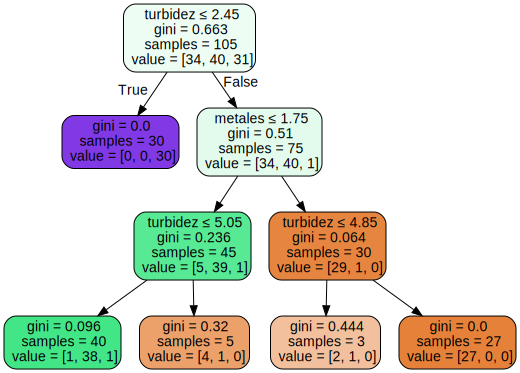

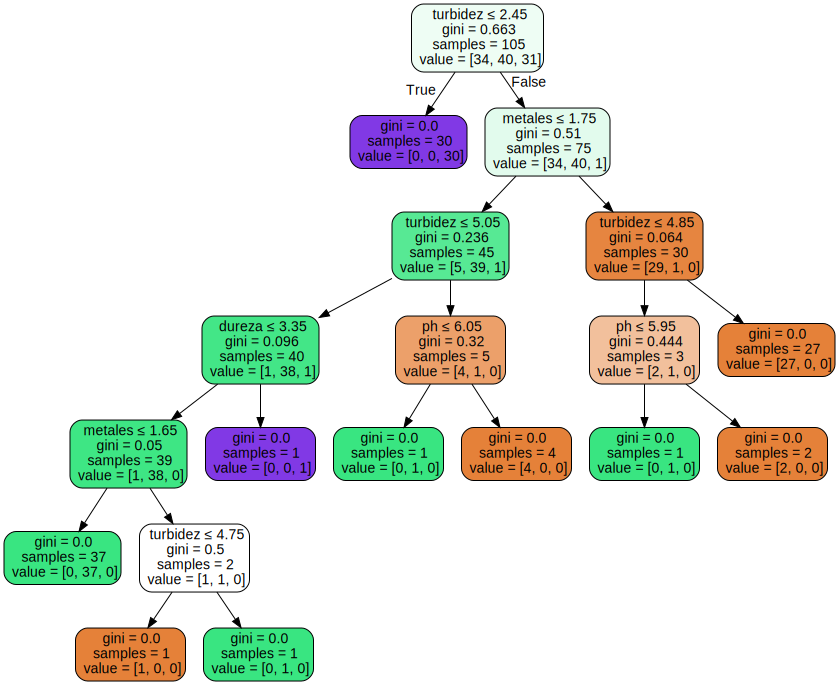

In [ ]:
dot_data1 = tree.export_graphviz(dt1, out_file=None,
                                 feature_names=X_train.columns,
                                 filled=True, rounded=True,
                                 special_characters=True)
graph1 = graphviz.Source(dot_data1)

dot_data2 = tree.export_graphviz(dt2, out_file=None,
                                 feature_names=X_train.columns,
                                 filled=True, rounded=True,
                                 special_characters=True)
graph2 = graphviz.Source(dot_data2)

display(graph1, graph2)

Si observamos el primer árbol, este está cortado debido a que hemos puesto como máxima profundidad 3 mientras que el segundo no tiene ningún límite.

Veamos las matrices de confusión.

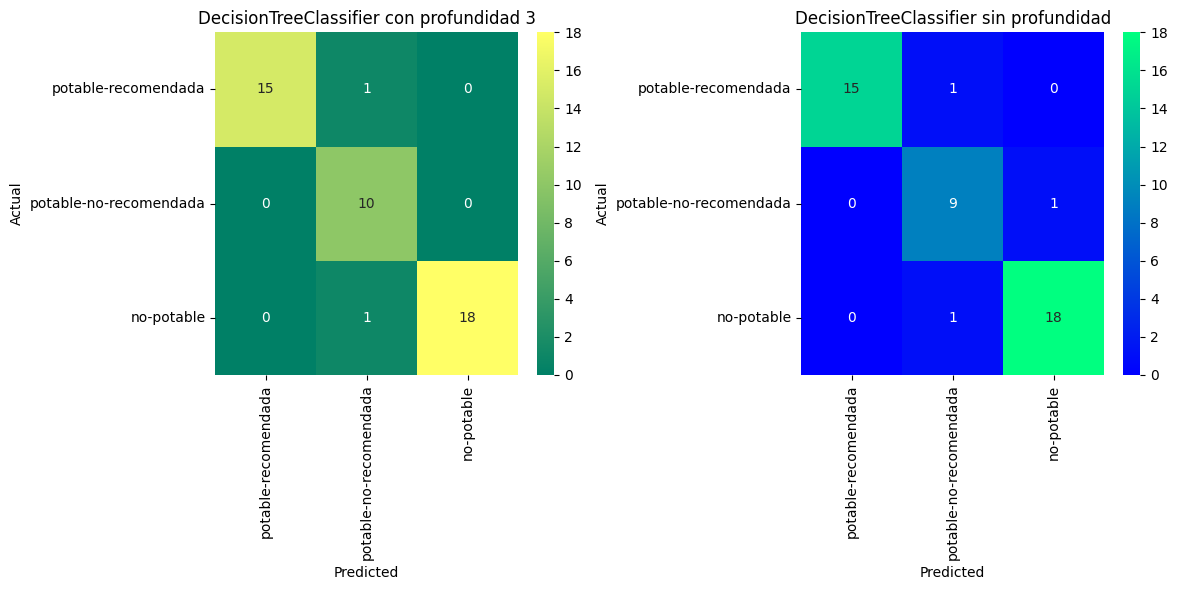

In [ ]:
cm_dt1 = confusion_matrix(y_test, y_pred_dt1)
cm_dt2 = confusion_matrix(y_test, y_pred_dt2)

DF_COLUMNS = data['resultado'].unique()

DF_INDEX = data['resultado'].unique()

cm_dt1_df = pd.DataFrame(cm_dt1, columns=DF_COLUMNS, index=DF_INDEX)
cm_dt2_df = pd.DataFrame(cm_dt2, columns=DF_COLUMNS, index=DF_INDEX)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(cm_dt1_df, annot=True, fmt="d", cmap="summer", ax=ax1)

ax1.set_title("DecisionTreeClassifier con profundidad 3")
ax1.set_xlabel("Predicted")
ax1.set_ylabel("Actual")

sns.heatmap(cm_dt2_df, annot=True, fmt="d", cmap="winter", ax=ax2)

ax2.set_title("DecisionTreeClassifier sin profundidad")
ax2.set_xlabel("Predicted")
ax2.set_ylabel("Actual")

plt.tight_layout()
plt.show()

Como podemos observar, los árboles de decisión han presentado un buen rendimiento también.

### 6) MLPClassifier

Ahora probaremos con un clasificador basado en redes neuronales como `MLPClassifier`.

In [ ]:
mlp1 = MLPClassifier(hidden_layer_sizes=(4, 4), max_iter=1000, random_state=42)
mlp1.fit(X_train, y_train)

mlp2 = MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000, random_state=42)
mlp2.fit(X_train, y_train)

y_pred_mlp1 = mlp1.predict(X_test)
y_pred_mlp2 = mlp2.predict(X_test)

print(classification_report(y_test, y_pred_mlp1))
print('-'*35)
print(classification_report(y_test, y_pred_mlp2))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


                        precision    recall  f1-score   support

            no-potable       1.00      1.00      1.00        16
potable-no-recomendada       1.00      1.00      1.00        10
   potable-recomendada       1.00      1.00      1.00        19

              accuracy                           1.00        45
             macro avg       1.00      1.00      1.00        45
          weighted avg       1.00      1.00      1.00        45

-----------------------------------
                        precision    recall  f1-score   support

            no-potable       1.00      1.00      1.00        16
potable-no-recomendada       1.00      1.00      1.00        10
   potable-recomendada       1.00      1.00      1.00        19

              accuracy                           1.00        45
             macro avg       1.00      1.00      1.00        45
          weighted avg       1.00      1.00      1.00        45



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Vemos que la precisión de nuestros modelos es perfecta en los 2. Vamos a realizar sus matrices de confusión.

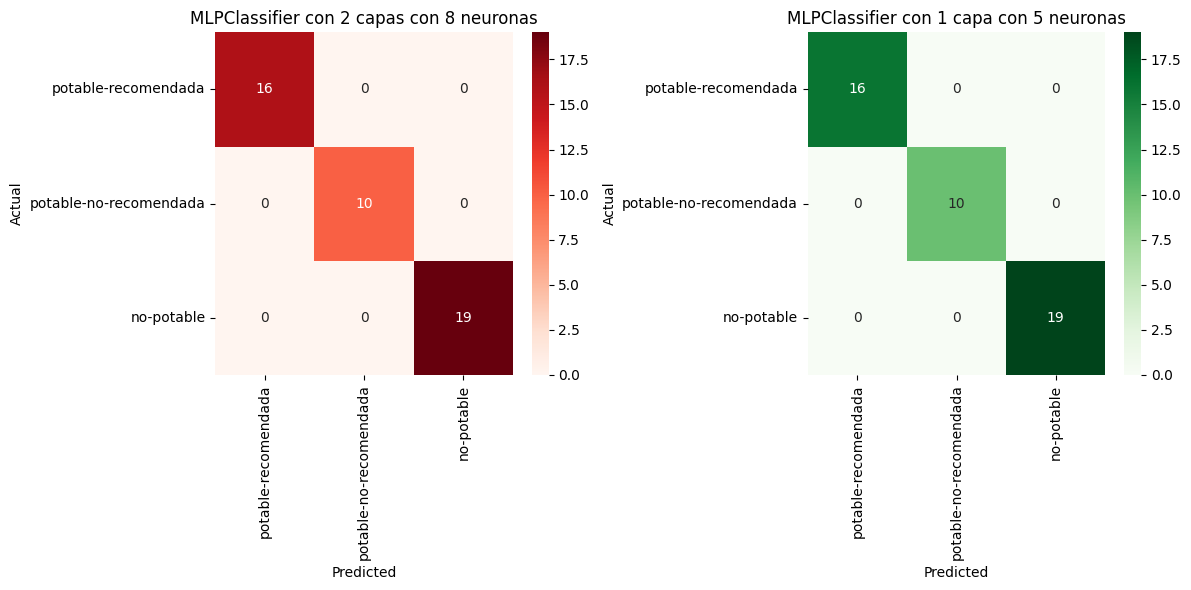

In [ ]:
cm_mlp1 = confusion_matrix(y_test, y_pred_mlp1)
cm_mlp2 = confusion_matrix(y_test, y_pred_mlp2)

DF_COLUMNS = data['resultado'].unique()

DF_INDEX = data['resultado'].unique()

cm_mlp1_df = pd.DataFrame(cm_mlp1, columns=DF_COLUMNS, index=DF_INDEX)
cm_mlp2_df = pd.DataFrame(cm_mlp2, columns=DF_COLUMNS, index=DF_INDEX)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(cm_mlp1_df, annot=True, fmt="d", cmap="Reds", ax=ax1)

ax1.set_title("MLPClassifier con 2 capas con 8 neuronas")
ax1.set_xlabel("Predicted")
ax1.set_ylabel("Actual")

sns.heatmap(cm_mlp2_df, annot=True, fmt="d", cmap="Greens", ax=ax2)

ax2.set_title("MLPClassifier con 1 capa con 5 neuronas")
ax2.set_xlabel("Predicted")
ax2.set_ylabel("Actual")

plt.tight_layout()
plt.show()


Como podíamos esperar, las matrices de confusión no tienen fallos. Por lo que estos modelos serían hasta el momento mejores que los modelos hechos por KNN.